<a href="https://colab.research.google.com/github/yulindonst/evormos/blob/main/number3/no3_script_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import io

In [ ]:
#consume data source from github
url = "https://raw.githubusercontent.com/yulindonst/evormos/main/number3/no3_datasource.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
print (df.head())

                 car   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0          Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1      Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2         Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3     Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4  Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2

[5 rows x 12 columns]


In [ ]:
#handling column car model, split it into model and series. take car model name and remove series
df[['model', 'series1', 'series2']] = df['car'].str.split(' ', expand=True)
df = df.drop(columns=['car', 'series1', 'series2'])
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc


In [ ]:
#handling categorical column: car model, pivot it
df=pd.get_dummies(df,drop_first=True)

In [ ]:
# extract independent variable and drop from data frame
y = df['mpg']
df = df.drop(['mpg'], axis=1)

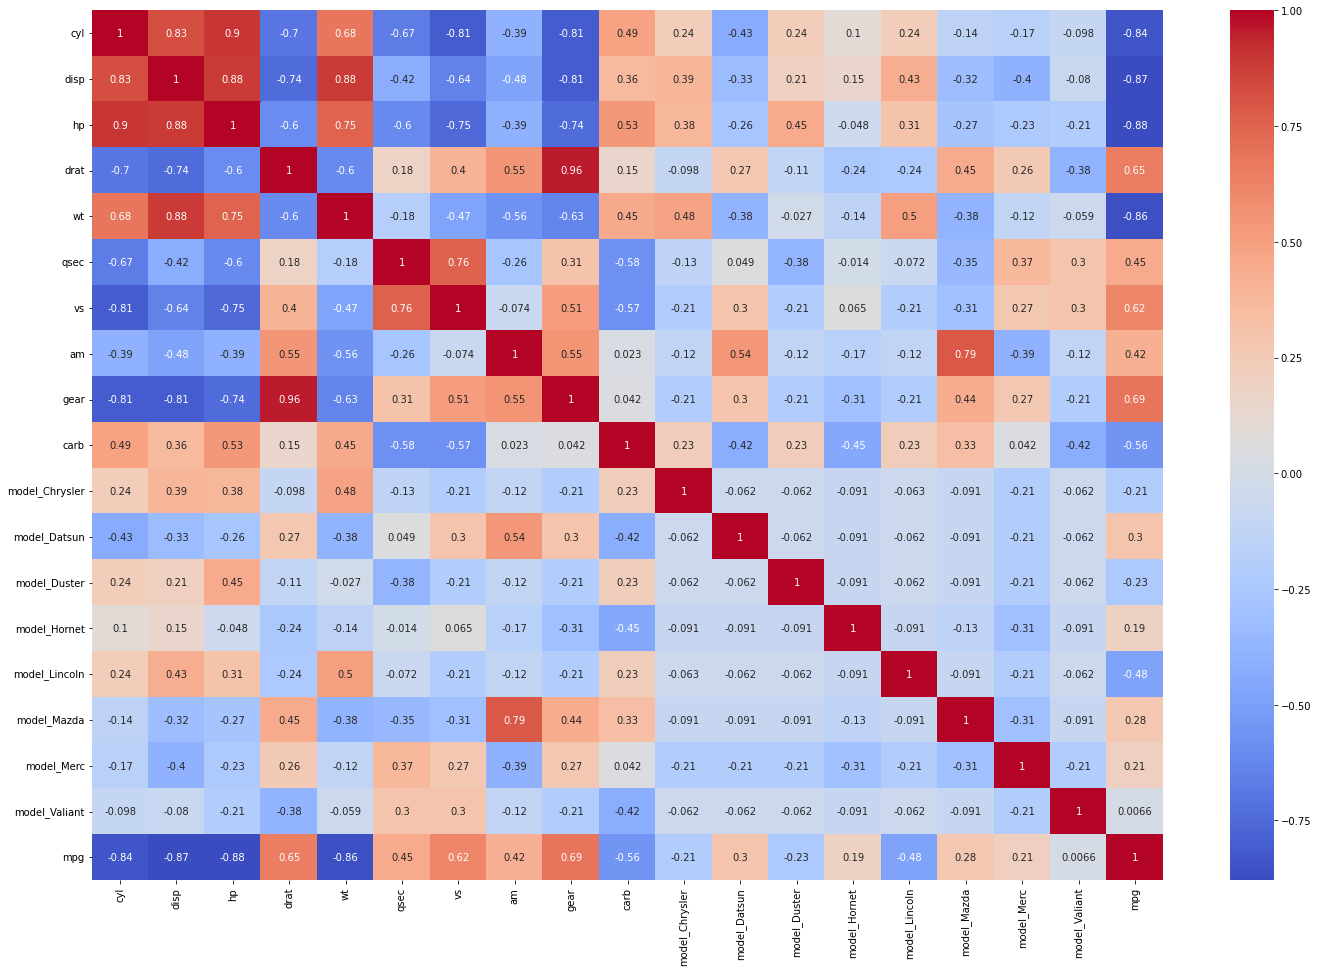

In [ ]:
#analyze correlation between columns from heatmap chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize = (24,16))
sns.heatmap(pd.concat([df,y], axis=1).corr(), annot=True, cmap='coolwarm')

In [ ]:
#I will choose feature with value more than 0.4 to get better models
#so, features are: draft, qsec, vs, am, gear
df2 = df.drop(columns=['cyl','disp','hp','wt','carb','model_Chrysler','model_Datsun','model_Duster','model_Hornet','model_Lincoln','model_Mazda','model_Merc','model_Valiant'], axis=1)

#df2 = df.drop(columns=['qsec','am','model_Chrysler','model_Datsun','model_Duster','model_Hornet','model_Lincoln','model_Mazda','model_Merc','model_Valiant'], axis=1)

In [ ]:
#normalization
df2 = (df2 - df2.mean())/df2.std()
y2 = (y - y.mean())/y.std()

In [ ]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [ ]:
#setting the matrixes
ones = np.ones([df2.shape[0],1])
X = np.concatenate((ones,df2),axis=1)


In [ ]:
y = y2.values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,9])

In [ ]:
#set hyper parameters
alpha = 0.01
iters = 1000

In [ ]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [ ]:
computeCost(X,y,theta)

8.0

In [ ]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

ValueError: ignored